In [1]:
%matplotlib inline
import os.path as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('whitegrid')

In [2]:
if op.isfile('brainmap_focus_counts.txt'):
    # Load if already saved
    bm_counts = np.loadtxt('brainmap_focus_counts.txt')
    ns_counts = np.loadtxt('neurosynth_focus_counts.txt')
else:
    # Generate and save if not
    bm = pd.read_csv('brainmap_database.csv')
    ns = pd.read_csv('database.txt', sep='\t')
    bm['id2'] = bm[['bmid', 'expid']].astype(str).apply(lambda x: '-'.join(x), axis=1)
    ns['id2'] = ns[['id', 'table_num']].astype(str).apply(lambda x: '-'.join(x), axis=1)
    bm_counts = bm.groupby('id2').size().values
    ns_counts = ns.groupby('id2').size().values
    np.savetxt('brainmap_focus_counts.txt', bm_counts, fmt='%i')
    np.savetxt('neurosynth_focus_counts.txt', ns_counts, fmt='%i')

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


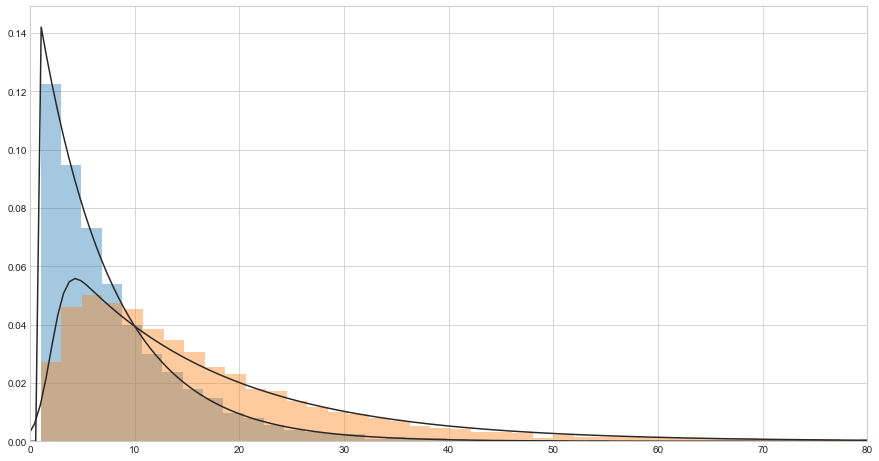

In [3]:
# Cropping this for visualization
ns_counts_red = ns_counts[ns_counts<100]

fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(bm_counts, ax=ax, kde=False, fit=stats.exponnorm, label='BrainMap')
sns.distplot(ns_counts_red, ax=ax, kde=False, fit=stats.exponnorm, label='Neurosynth')

ax.set_xlim((0, 80))
fig.show()

In [4]:
bm_params = stats.exponnorm.fit(bm_counts)
ns_params = stats.exponnorm.fit(ns_counts)